### Exercise 2

In [37]:
from PIL import Image
import torch
import numpy
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt 

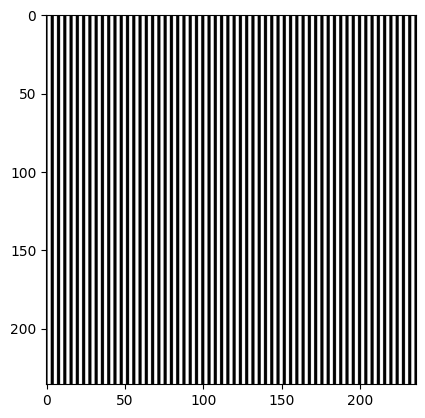

In [39]:
vert = Image.open("input_images/stripes_vert.gif")
diag = Image.open("input_images/stripes_diag.gif")
vert_array = numpy.array(vert)
diag_array = numpy.array(diag)

arr_vert_crop = vert_array[10:-10, 10:-10]
arr_diag_crop = diag_array[10:-10, 10:-10]

# Threshold
threshold_val = 1.1
arr_vert_thresh = np.clip(arr_vert_crop, None, threshold_val)
arr_diag_thresh = np.clip(arr_diag_crop, None, threshold_val)

plt.imshow(arr_vert_thresh, cmap='gray')
plt.show()

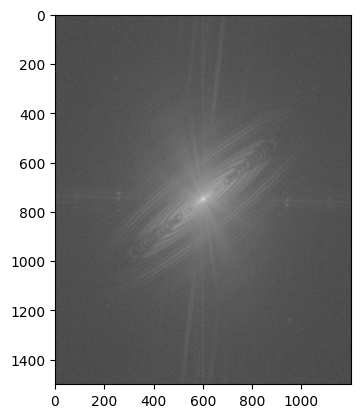

In [62]:
saturn = Image.open("input_images/saturn.png").convert("L")
saturn_array = np.array(saturn)

# Compute 2D FFT and shift
dft = np.fft.fft2(saturn_array)
shifted = np.fft.fftshift(dft) # Just for shifting nothing else. 
mag = np.log1p(np.abs(shifted))
angle = np.angle(shifted)

plt.imshow(mag, cmap='gray')
plt.show()

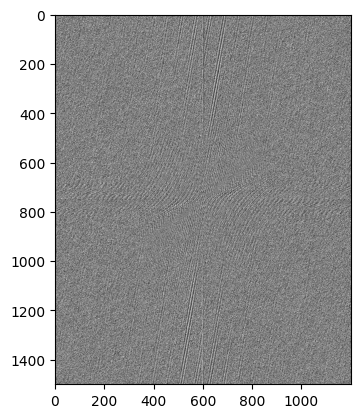

In [55]:
plt.imshow(angle, cmap='gray')

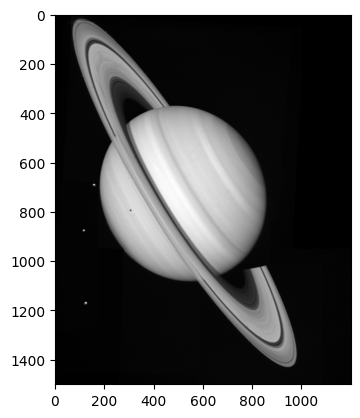

In [59]:
back = np.fft.ifft2(np.fft.ifftshift(shifted))
back = np.abs(back)
plt.imshow(back, cmap='gray')

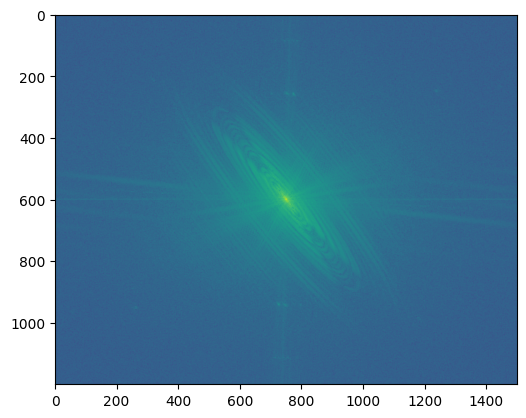

In [ ]:
# Rotate the image
rotated = np.rot90(saturn_array, k=1)  # Rotate
fft = np.fft.fftshift(np.fft.fft2(rotated))
mag = np.log1p(np.abs(fft))
plt.imshow(mag) # 

In [76]:
width, height = saturn.width, saturn.height

saturn.resize((width//2, height//2), resample = Image.NEAREST)
saturn_lanczos = saturn.resize((width//2, height//2), resample=Image.LANCZOS)